In [1]:
from struct import unpack
import glob
import pandas as pd

def parse_binary( raw_data ):
	"""
	Takes a raw binary string containing data from our oscilloscope.
	Returns the corresponding float vector.
	"""
	ins =  4   # Size of int stored if the raw binary string
	cur =  0   # Cursor walking in the string and getting data
	cur += 12  # Skipping the global raw binary string header
	whs =  unpack("i", raw_data[cur:cur+ins])[0] # Storing size of the waveform header
	cur += whs # Skipping the waveform header
	dhs =  unpack("i", raw_data[cur:cur+ins])[0] # Storing size of the data header
	cur += dhs # Skipping the data header
	bfs =  unpack("i", raw_data[cur-ins:cur])[0] # Storing the data size
	sc  =  bfs/ins # Samples Count - How much samples compose the wave
	dat =  unpack("f"*int(sc), raw_data[cur:cur+bfs])
	return dat

# Path to the directory with CSV files
dataset_dir = "secmatv1_2006_04_0809/"
files = glob.glob(f"{dataset_dir}/*.bin")

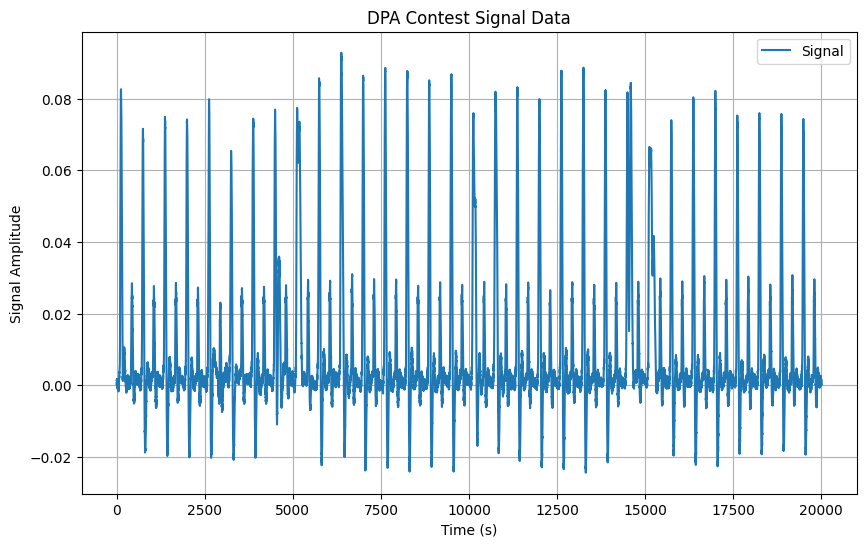

In [2]:
import matplotlib.pyplot as plt

# Load the CSV file
file_path = files[0]

with open(file_path, mode='rb') as file: # b is important -> binary
	fileContent = file.read()
	data = parse_binary(fileContent)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data, label="Signal")
plt.xlabel("Time (s)")
plt.ylabel("Signal Amplitude")
plt.title("DPA Contest Signal Data")
plt.legend()
plt.grid(True)
plt.show()